Name: Kelley Monzella

Date: 2021/02/19

Purpose: Pull the latitude and longitude information for hospitals in the chicagoland area. Also pull census data for every census block in Cook county. These data will later be merged and analyzed to determine the optimal location for hospitals to reduce Chicagoan travel time.

## Part 0: Program setup

In [1]:
# load necessary packages
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
import censusdata

from geopy.geocoders          import Nominatim
from geopy.extra.rate_limiter import RateLimiter

## Part 1: Get lat/long for hospitals

In [2]:
# load the data set
# source: https://catalog.data.gov/dataset/hospitals-chicago
df = pd.read_csv('hospitals_clean.csv' , low_memory = False)
df.head()


,BLDGID,X,Y,BLDGNOTES,LABEL,FACILITY,CITY,ADDRESS,COMMONNAME,TYPE1,...,DTOPEN,DTCLOSE,CA2,USE,EDITDATE,ZIP,WARD,TRACT,AREA_NUMBE,COMMUNITY
0,34142,1168427.011,1940926.452,NaN,Kindred- Lakeshore,Kindred Hospital - Chicago Lakeshore,Chicago,6130 N. Sheridan,Kindred Hospital - Chicago Lakeshore,HOSPITAL,...,NaN,NaN,77,Hospitals,8/10/2007,60660,48,30100,77,EDGEWATER
1,262155,1171002.449,1916046.010,NaN,Children's,Children's Memorial Hospital,Chicago,225 East Chicago Avenue,Children's Memorial Hospital,HOSPITAL,...,NaN,NaN,7,Hospitals,8/10/2007,60614,43,71200,7,LINCOLN PARK
2,533051,1175254.006,1862670.662,NaN,St Bernard,St Bernard Hospital,Chicago,326 W. 64th Street,St. Bernard Hospital,HOSPITAL,...,NaN,NaN,68,Hospitals,8/10/2007,60621,20,680900,68,ENGLEWOOD
3,565454,1159091.550,1859131.693,NaN,Holy Cross,Holy Cross Hospital,Chicago,2701 W. 68th Street,Holy Cross Hospital,HOSPITAL,...,NaN,NaN,66,Hospitals,8/10/2007,60629,15,660900,66,CHICAGO LAWN
4,220136,1169801.369,1920306.523,NaN,IL Masonic,Advocate Illinois Masonic Medical Center,Chicago,836 W. Wellington,Advocate Illinois Masonic Med Ctr,HOSPITAL,...,NaN,NaN,6,Hospitals,8/10/2007,60657,44,63000,6,LAKE VIEW


In [3]:
# set up geocoder
geolocator = Nominatim(user_agent="http")

# begin geocoding data
# 1 - convenient function to delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# 2- - create location column
df['ADDRESS_CHI'] = df['ADDRESS'] + " "  + df['CITY']
df['location'] = df['ADDRESS_CHI'].apply(geocode)

# 3 - create longitude, latitude and altitude from location column (returns tuple)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

# check and drop the cases that could not be geocoded

# 4 - split point column into latitude, longitude and altitude columns
df[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df['point'].tolist(), index=df.index)
df

# double check these to make sure in IL. 

,BLDGID,X,Y,BLDGNOTES,LABEL,FACILITY,CITY,ADDRESS,COMMONNAME,TYPE1,...,WARD,TRACT,AREA_NUMBE,COMMUNITY,ADDRESS_CHI,location,point,latitude,longitude,altitude
0,34142,1168427.011,1940926.452,NaN,Kindred- Lakeshore,Kindred Hospital - Chicago Lakeshore,Chicago,6130 N. Sheridan,Kindred Hospital - Chicago Lakeshore,HOSPITAL,...,48,30100,77,EDGEWATER,6130 N. Sheridan Chicago,"(Sheridan, 3940, North Sheridan Road, Wrigleyv...","(41.9538873, -87.654928, 0.0)",41.953887,-87.654928,0.0
1,262155,1171002.449,1916046.010,NaN,Children's,Children's Memorial Hospital,Chicago,225 East Chicago Avenue,Children's Memorial Hospital,HOSPITAL,...,43,71200,7,LINCOLN PARK,225 East Chicago Avenue Chicago,"(Ann & Robert H. Lurie Children's Hospital, 22...","(41.89624405, -87.62183140068906, 0.0)",41.896244,-87.621831,0.0
2,533051,1175254.006,1862670.662,NaN,St Bernard,St Bernard Hospital,Chicago,326 W. 64th Street,St. Bernard Hospital,HOSPITAL,...,20,680900,68,ENGLEWOOD,326 W. 64th Street Chicago,"(Saint Bernard Hospital, 326, West 64th Street...","(41.778591399999996, -87.6330563253586, 0.0)",41.778591,-87.633056,0.0
3,565454,1159091.550,1859131.693,NaN,Holy Cross,Holy Cross Hospital,Chicago,2701 W. 68th Street,Holy Cross Hospital,HOSPITAL,...,15,660900,66,CHICAGO LAWN,2701 W. 68th Street Chicago,"(Holy Cross Hospital, 2701, West 68th Street, ...","(41.7693648, -87.69221219763949, 0.0)",41.769365,-87.692212,0.0
4,220136,1169801.369,1920306.523,NaN,IL Masonic,Advocate Illinois Masonic Medical Center,Chicago,836 W. Wellington,Advocate Illinois Masonic Med Ctr,HOSPITAL,...,44,63000,6,LAKE VIEW,836 W. Wellington Chicago,"(Wellington, 941, West Wellington Avenue, Lake...","(41.9364321, -87.6532711, 0.0)",41.936432,-87.653271,0.0
5,231905,1173643.692,1919212.347,NaN,St Joseph,Saint Joseph Hospital,Chicago,2900 N. Lake Shore Drive,St. Joseph Hospital,HOSPITAL,...,44,63300,6,LAKE VIEW,2900 N. Lake Shore Drive Chicago,"(Presence Saint Joseph Hospital, 2900, North L...","(41.934547699999996, -87.63738486881796, 0.0)",41.934548,-87.637385,0.0
6,768203,1177694.542,1831236.566,NaN,Roseland,Roseland Community Hospital,Chicago,45 W. 111th Street,Roseland Community Hospital,HOSPITAL,...,34,491300,49,ROSELAND,45 W. 111th Street Chicago,"(Roseland Community Hospital, 45, West 111th S...","(41.692759249999995, -87.62494155027585, 0.0)",41.692759,-87.624942,0.0
7,688580,1193491.059,1844003.401,NaN,Trinity,Advocate Trinity Hospital,Chicago,2320 E. 93rd Street,Advocate Trinity Hospital,HOSPITAL,...,7,480400,48,CALUMET HEIGHTS,2320 E. 93rd Street Chicago,"(Advocate Trinity Hospital, 2320, East 93rd St...","(41.72643515, -87.56696931921603, 0.0)",41.726435,-87.566969,0.0
8,616860,1192764.496,1852230.406,NaN,South Shore,South Shore Hospital,Chicago,8012 S. Crandon,South Shore Hospital,HOSPITAL,...,8,460500,46,SOUTH CHICAGO,8012 S. Crandon Chicago,"(8012, South Crandon Avenue, South Chicago, Ch...","(41.749623858338346, -87.56874478278245, 0.0)",41.749624,-87.568745,0.0
9,535850,1192080.038,1862386.226,NaN,La Rabida,La Rabida Children's Hospital,Chicago,6501 S. Promontory Drive,La Rabida Hospital,HOSPITAL,...,5,421100,42,WOODLAWN,6501 S. Promontory Drive Chicago,"(La Rabida Children's Hospital, 6501, South Pr...","(41.77746435, -87.57163016104502, 0.0)",41.777464,-87.571630,0.0


In [4]:
# save out file
df.to_excel(r'geocoded_hospitals.xlsx', index = False)

## Part 2.0: Get census data for all chicago 

source:https://towardsdatascience.com/accessing-census-data-with-python-3e2f2b56e20d

In [3]:
# check available census data with the word 'population' in concept.
# note that this is pulling ACS 5-year data, 2015.
sample = censusdata.search('acs5', 2015,'concept', 'health') # Team note: we can play around with the last parameter here to pull additional census variables
sample

# features of interest: (note that we can also get the margin or error for all of these)
#   B00001_001E: Unweighted Sample Count of the Population
#   B01003_001E: Total Population 
#   Additional options to explore: health status (concept == 'health'), age

[('B18135_001E',
  'B18135.  Age by Disability Status by Health Insurance Coverage Status',
  'Total:'),
 ('B18135_001M',
  'B18135.  Age by Disability Status by Health Insurance Coverage Status',
  'Margin of Error for!!Total:'),
 ('B18135_002E',
  'B18135.  Age by Disability Status by Health Insurance Coverage Status',
  'Under 18 years:'),
 ('B18135_002M',
  'B18135.  Age by Disability Status by Health Insurance Coverage Status',
  'Margin of Error for!!Under 18 years:'),
 ('B18135_003E',
  'B18135.  Age by Disability Status by Health Insurance Coverage Status',
  'Under 18 years:!!With a disability:'),
 ('B18135_003M',
  'B18135.  Age by Disability Status by Health Insurance Coverage Status',
  'Margin of Error for!!Under 18 years:!!With a disability:'),
 ('B18135_004E',
  'B18135.  Age by Disability Status by Health Insurance Coverage Status',
  'Under 18 years:!!With a disability:!!With health insurance coverage:'),
 ('B18135_004M',
  'B18135.  Age by Disability Status by Health 

In [6]:
# check IL state number
states = censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2015)
print(states['Illinois'])
      
# all counties in IL
counties = censusdata.geographies(censusdata.censusgeo([('state', '17'), ('county', '*')]), 'acs5', 2015)
print(counties["Cook County, Illinois"])

# from this, we know that cook county is state 17 and county 031

Summary level: 040, state:17
Summary level: 050, state:17> county:031


In [7]:
cook = censusdata.download('acs5', 2015,
           censusdata.censusgeo([('state', '17'),
                                 ('county', '031'),
                                 ('block group', '*')]),
          ['B00001_001E', 'B01003_001E'])

# check the number of rows (block groups)
print(cook.shape)

# rename variables to have intuitive names
cook = cook.rename(columns = {"B00001_001E": "unweighted_population_sample_B00001",
                              "B01003_001E": "total_population_B01003"}) 
  

cook.head(50)

(3993, 2)


,unweighted_population_sample_B00001,total_population_B01003
"Block Group 1, Census Tract 202, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020200> block group:1",78.0,1359
"Block Group 2, Census Tract 202, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020200> block group:2",58.0,1459
"Block Group 3, Census Tract 202, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020200> block group:3",81.0,1841
"Block Group 4, Census Tract 202, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020200> block group:4",76.0,1975
"Block Group 1, Census Tract 203.01, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020301> block group:1",143.0,1590
"Block Group 2, Census Tract 203.01, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020301> block group:2",133.0,1422
"Block Group 3, Census Tract 203.01, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020301> block group:3",165.0,2130
"Block Group 1, Census Tract 203.02, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020302> block group:1",71.0,787
"Block Group 2, Census Tract 203.02, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020302> block group:2",77.0,1013
"Block Group 3, Census Tract 203.02, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020302> block group:3",195.0,3086


## Part 2.1: Get lat/lon centroid for all census block groups in Cook County

In [8]:
# data cleaning for merge to centroids
cook['index'] = cook.index.astype(str)

# build merge variables - we already know some of these from data pull
cook['state']  = '17'
cook['county'] = '031'
cook['block']  = cook['index'].str[-1]
cook['tract']  = cook['index'].str[-21:-15]

# fips code is a combination of state, county, tract, and block
cook['fips'] = cook['state'] + cook['county'] + cook['tract'] + cook['block']
cook

,unweighted_population_sample_B00001,total_population_B01003,index,state,county,block,tract,fips
"Block Group 1, Census Tract 202, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020200> block group:1",78.0,1359,"Block Group 1, Census Tract 202, Cook County, ...",17,031,1,020200,170310202001
"Block Group 2, Census Tract 202, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020200> block group:2",58.0,1459,"Block Group 2, Census Tract 202, Cook County, ...",17,031,2,020200,170310202002
"Block Group 3, Census Tract 202, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020200> block group:3",81.0,1841,"Block Group 3, Census Tract 202, Cook County, ...",17,031,3,020200,170310202003
"Block Group 4, Census Tract 202, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020200> block group:4",76.0,1975,"Block Group 4, Census Tract 202, Cook County, ...",17,031,4,020200,170310202004
"Block Group 1, Census Tract 203.01, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:020301> block group:1",143.0,1590,"Block Group 1, Census Tract 203.01, Cook Count...",17,031,1,020301,170310203011
...,...,...,...,...,...,...,...,...
"Block Group 1, Census Tract 6606, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:660600> block group:1",71.0,1140,"Block Group 1, Census Tract 6606, Cook County,...",17,031,1,660600,170316606001
"Block Group 2, Census Tract 6606, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:660600> block group:2",43.0,666,"Block Group 2, Census Tract 6606, Cook County,...",17,031,2,660600,170316606002
"Block Group 3, Census Tract 6606, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:660600> block group:3",83.0,1480,"Block Group 3, Census Tract 6606, Cook County,...",17,031,3,660600,170316606003
"Block Group 4, Census Tract 6606, Cook County, Illinois: Summary level: 150, state:17> county:031> tract:660600> block group:4",88.0,1533,"Block Group 4, Census Tract 6606, Cook County,...",17,031,4,660600,170316606004


In [9]:
# read in lat/long of centroids
# source: https://www.baruch.cuny.edu/confluence/display/geoportal/US+Census+Population+Centroids
centroids = pd.read_csv('popctr_blkgrp2010.csv' , low_memory = False)
print(centroids.head())

# keep only illinois
centroids = centroids[centroids['STATE']==17]
print(centroids.head())

          FIPS  STATE  COUNTY  TRACT  BLKGRP  POPULATION   LATITUDE  LONGITUDE
0  10010201001      1       1  20100       1         698  32.464812 -86.486527
1  10010201002      1       1  20100       2        1214  32.482391 -86.486912
2  10010202001      1       1  20200       1        1003  32.478035 -86.474786
3  10010202002      1       1  20200       2        1167  32.466372 -86.471060
4  10010203001      1       1  20300       1        2549  32.476828 -86.460326
               FIPS  STATE  COUNTY  TRACT  BLKGRP  POPULATION   LATITUDE  \
59463  170010001001     17       1    100       1        1168  39.952505   
59464  170010001002     17       1    100       2         756  39.941865   
59465  170010001003     17       1    100       3         948  39.944340   
59466  170010001004     17       1    100       4         899  39.938156   
59467  170010001005     17       1    100       5         856  39.939009   

       LONGITUDE  
59463 -91.359197  
59464 -91.362125  
59465 -91.37

In [10]:
# keep just the variables of interest from centroids
centroids_new = centroids.drop(['STATE', 'COUNTY', 'TRACT', 'BLKGRP', 'POPULATION'], axis=1)

# create merge indicators and update merge var
centroids_new['in_cent'] = 1
cook['in_cook']          = 1

centroids_new['fips'] = centroids_new['FIPS'].astype(str)

print(centroids_new.head())


               FIPS   LATITUDE  LONGITUDE  in_cent          fips
59463  170010001001  39.952505 -91.359197        1  170010001001
59464  170010001002  39.941865 -91.362125        1  170010001002
59465  170010001003  39.944340 -91.374426        1  170010001003
59466  170010001004  39.938156 -91.371588        1  170010001004
59467  170010001005  39.939009 -91.345799        1  170010001005


In [11]:
# merge on lat/long by FIPS code
merged = pd.merge(cook, centroids_new, on = 'fips', how = 'left')

# check merge
print(merged['in_cook'].value_counts())
print(merged['in_cent'].value_counts())

# add assertion to make sure N matches -- meaning everything in Chicago data merged to centroid data

1    3993
Name: in_cook, dtype: int64
1    3993
Name: in_cent, dtype: int64


In [12]:
# save out file
merged_out = merged.drop(['index', 'state','county', 'in_cook', 'in_cent', 'block', 'tract'], axis=1) 
merged_out.to_excel(r'cookcty_census_geocoded.xlsx', index = False)

## Part 2.2 Limit data to chicago
source data: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-City/ewy2-6yfk
source code:https://medium.com/dataexplorations/working-with-open-data-shape-files-using-geopandas-how-to-match-up-your-data-with-the-areas-9377471e49f2



In [13]:
import shapefile
import fiona
import shapely
import descartes
import geopandas              as gpd
import matplotlib.pyplot      as plt
from   shapely.geometry       import Point
from   shapely.ops            import cascaded_union
from   shapely.geometry       import shape,mapping, Point, Polygon, MultiPolygon

# creating a geometry column 
geometry = [Point(xy) for xy in zip(merged_out['LONGITUDE'], merged_out['LATITUDE'])]

# Coordinate reference system
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(merged_out, crs=crs, geometry=geometry)

# Check files and output
gdf.head()
gdf.to_file('gdf_out.shp',driver ='ESRI Shapefile')

C:\Users\KMonzella\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [14]:
# read back in geo data
pointdf = gpd.GeoDataFrame.from_file("gdf_out.shp")
print(pointdf)

      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
0           78.0        1359  170310202001  170310202001  42.013678   
1           58.0        1459  170310202002  170310202002  42.014549   
2           81.0        1841  170310202003  170310202003  42.017496   
3           76.0        1975  170310202004  170310202004  42.017145   
4          143.0        1590  170310203011  170310203011  42.009349   
...          ...         ...           ...           ...        ...   
3988        71.0        1140  170316606001  170316606001  41.777376   
3989        43.0         666  170316606002  170316606002  41.777318   
3990        83.0        1480  170316606003  170316606003  41.777253   
3991        88.0        1533  170316606004  170316606004  41.777120   
3992        69.0        1227  170316606005  170316606005  41.777150   

      LONGITUDE                    geometry  
0    -87.703936  POINT (-87.70394 42.01368)  
1    -87.693664  POINT (-87.69366 42.01455)  
2    -87.

In [15]:
# read in chicago polygon data
multipol = fiona.open("geo_export_1fa84e9b-67d6-4d1c-ac81-4a73e71a6d8e.shp")
multi    = multipol.next() # only one feature in the shapefile
print(multi)

{'type': 'Feature', 'id': '0', 'properties': OrderedDict(), 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[(-87.93514385942143, 42.00088911607326), (-87.9352110270025, 42.00081664143955), (-87.93529133950187, 42.00072700895027), (-87.93551196383594, 42.000480781935586), (-87.93574247939097, 42.00025812301311), (-87.93584505940073, 42.000159039381906), (-87.93590356821541, 42.00010497538239), (-87.93598608216818, 42.00001374987231), (-87.93632784066214, 41.99960326946243), (-87.9366154497264, 41.99923337944194), (-87.93677128867272, 41.999023248278675), (-87.9368759749499, 41.998881847153044), (-87.93693408810181, 41.99880335510703), (-87.93706164890665, 41.998612362462175), (-87.93707950926456, 41.998585741964575), (-87.93905445886887, 41.99826104013864), (-87.93982896518334, 41.99813745944146), (-87.93989441399762, 41.9981270162374), (-87.94002020835825, 41.99810694262792), (-87.94005007906628, 41.99896069051319), (-87.9400819857009, 41.9998725169338), (-87.94009181181038, 42.

C:\Users\KMonzella\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# loop through all of the census points and see if it falls within or outside of polygon
# only save the census points within the polygon

# get a list of all points in the census data
points= ([pt for pt  in fiona.open("gdf_out.shp")])

# initialize a data frame to store chicago-only points
chi = pd.DataFrame()

# begin looping through points
for i, pt in enumerate(points):
    point = shape(pt['geometry'])
    if point.within(shape(multi['geometry'])):
         print(i), shape(points[i]['geometry'])
         temp = pd.DataFrame(pointdf.iloc[[i]])
         print(temp)
         chi = pd.concat([chi, temp])
    
# check the dataset limited to chicago data points
print(chi)


0
   unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
0        78.0        1359  170310202001  170310202001  42.013678 -87.703936   

                     geometry  
0  POINT (-87.70394 42.01368)  
1
   unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
1        58.0        1459  170310202002  170310202002  42.014549 -87.693664   

                     geometry  
1  POINT (-87.69366 42.01455)  
2
   unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
2        81.0        1841  170310202003  170310202003  42.017496 -87.704314   

                     geometry  
2  POINT (-87.70431 42.01750)  
3
   unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
3        76.0        1975  170310202004  170310202004  42.017145 -87.695391   

                     geometry  
3  POINT (-87.69539 42.01714)  
4
   unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
4       143.0      

    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
46        58.0        1465  170310301014  170310301014  41.991704 -87.654974   

                      geometry  
46  POINT (-87.65497 41.99170)  
47
    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
47        85.0        1053  170310301021  170310301021  41.993419 -87.655017   

                      geometry  
47  POINT (-87.65502 41.99342)  
48
    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
48        57.0         687  170310301022  170310301022  41.993709 -87.658351   

                      geometry  
48  POINT (-87.65835 41.99371)  
49
    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
49        78.0        1140  170310301023  170310301023  41.993469 -87.656486   

                      geometry  
49  POINT (-87.65649 41.99347)  
50
    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \


91
    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
91        85.0        1785  170310102011  170310102011  42.014418 -87.682015   

                      geometry  
91  POINT (-87.68202 42.01442)  
92
    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
92       224.0        4339  170310102012  170310102012  42.017092 -87.681115   

                      geometry  
92  POINT (-87.68112 42.01709)  
93
    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
93        54.0        1105  170310102013  170310102013  42.014125  -87.67782   

                      geometry  
93  POINT (-87.67782 42.01412)  
94
    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
94        98.0        1052  170310102021  170310102021  42.017165 -87.673152   

                      geometry  
94  POINT (-87.67315 42.01717)  
95
    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE 

359
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
359        62.0         779  170318309003  170318309003  41.930769 -87.689571   

                       geometry  
359  POINT (-87.68957 41.93077)  
360
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
360        97.0         847  170318310001  170318310001  41.913404 -87.679202   

                       geometry  
360  POINT (-87.67920 41.91340)  
361
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
361       149.0        1437  170318310002  170318310002  41.916076 -87.675109   

                       geometry  
361  POINT (-87.67511 41.91608)  
362
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
362        73.0        1166  170318311001  170318311001  41.940709 -87.715775   

                       geometry  
362  POINT (-87.71577 41.94071)  
363
     unweighted  total_popu          fips        FIPS_1 

445
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
445       192.0        2059  170318326003  170318326003  41.916007 -87.650903   

                       geometry  
445  POINT (-87.65090 41.91601)  
446
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
446       148.0        1689  170318329001  170318329001  41.873158 -87.663774   

                       geometry  
446  POINT (-87.66377 41.87316)  
447
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
447        87.0         924  170318329002  170318329002  41.873066 -87.659222   

                       geometry  
447  POINT (-87.65922 41.87307)  
448
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
448       127.0        1611  170318330001  170318330001  41.883639 -87.651175   

                       geometry  
448  POINT (-87.65117 41.88364)  
449
     unweighted  total_popu          fips        FIPS_1 

532  POINT (-87.68948 41.78482)  
533
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
533        86.0        1014  170318351001  170318351001  41.790465  -87.68523   

                       geometry  
533  POINT (-87.68523 41.79047)  
534
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
534        88.0        1474  170318351002  170318351002  41.790841 -87.689266   

                       geometry  
534  POINT (-87.68927 41.79084)  
535
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
535        90.0        1496  170318351003  170318351003  41.787497 -87.688477   

                       geometry  
535  POINT (-87.68848 41.78750)  
536
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
536        89.0        1601  170318351004  170318351004  41.790455 -87.692582   

                       geometry  
536  POINT (-87.69258 41.79046)  
537
     unweighted  total

     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
621       192.0        2080  170318378001  170318378001  41.882987 -87.685389   

                       geometry  
621  POINT (-87.68539 41.88299)  
622
     unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
622       118.0        1392  170318378002  170318378002  41.88316 -87.679407   

                       geometry  
622  POINT (-87.67941 41.88316)  
623
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
623        95.0        1003  170318380001  170318380001  41.879656 -87.681928   

                       geometry  
623  POINT (-87.68193 41.87966)  
624
     unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
624       141.0        1925  170318380002  170318380002  41.87689 -87.679801   

                       geometry  
624  POINT (-87.67980 41.87689)  
625
     unweighted  total_popu          fips        FIPS_1  LATITUD

707  POINT (-87.63862 41.82682)  
708
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
708        84.0         679  170318401001  170318401001  41.844386 -87.639977   

                       geometry  
708  POINT (-87.63998 41.84439)  
709
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
709       156.0        1960  170318401002  170318401002  41.840794 -87.639298   

                       geometry  
709  POINT (-87.63930 41.84079)  
710
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
710       340.0        2580  170318402001  170318402001  41.842421 -87.649581   

                       geometry  
710  POINT (-87.64958 41.84242)  
711
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
711        58.0         721  170318403001  170318403001  41.831063 -87.686065   

                       geometry  
711  POINT (-87.68606 41.83106)  
712
     unweighted  total

     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
795       114.0        1478  170318423001  170318423001  41.903385 -87.662013   

                       geometry  
795  POINT (-87.66201 41.90339)  
796
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
796       223.0        2276  170318423002  170318423002  41.894117 -87.648815   

                       geometry  
796  POINT (-87.64881 41.89412)  
797
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
797        79.0        1012  170318424001  170318424001  41.748308  -87.62726   

                       geometry  
797  POINT (-87.62726 41.74831)  
798
     unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
798       129.0        1632  170318424002  170318424002  41.746877 -87.630793   

                       geometry  
798  POINT (-87.63079 41.74688)  
799
     unweighted  total_popu          fips        FIPS_1   LA

1187
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1187       147.0        1397  170316607001  170316607001  41.776149   

      LONGITUDE                    geometry  
1187 -87.681402  POINT (-87.68140 41.77615)  
1188
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1188       125.0        1001  170316607002  170316607002  41.771256   

      LONGITUDE                    geometry  
1188 -87.681234  POINT (-87.68123 41.77126)  
1189
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1189        57.0         756  170316608001  170316608001  41.773752   

      LONGITUDE                    geometry  
1189 -87.685612  POINT (-87.68561 41.77375)  
1190
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1190        68.0        1137  170316608002  170316608002  41.773745   

      LONGITUDE                    geometry  
1190 -87.688956  POINT (-87.68896 41.77374)  
1191
      unweighted  total_popu       

1231 -87.704775  POINT (-87.70477 41.74396)  
1232
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1232        66.0         952  170317004021  170317004021  41.739817   

      LONGITUDE                    geometry  
1232 -87.717584  POINT (-87.71758 41.73982)  
1233
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1233       101.0        1213  170317004022  170317004022  41.737039   

      LONGITUDE                    geometry  
1233 -87.715334  POINT (-87.71533 41.73704)  
1234
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1234       130.0        2027  170317004023  170317004023  41.739067   

      LONGITUDE                    geometry  
1234 -87.707092  POINT (-87.70709 41.73907)  
1235
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1235        68.0        1823  170317005011  170317005011  41.747064   

      LONGITUDE                    geometry  
1235 -87.685605  POINT (-87.68561 41.747

1280
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1280       251.0        1677  170310510001  170310510001  41.941257   

      LONGITUDE                    geometry  
1280 -87.685403  POINT (-87.68540 41.94126)  
1281
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
1281       218.0        1454  170310511001  170310511001  41.94132 -87.680809   

                        geometry  
1281  POINT (-87.68081 41.94132)  
1282
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1282       108.0         749  170310512001  170310512001  41.942331   

      LONGITUDE                    geometry  
1282 -87.676317  POINT (-87.67632 41.94233)  
1283
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
1283       121.0         887  170310512002  170310512002  41.94049 -87.676166   

                        geometry  
1283  POINT (-87.67617 41.94049)  
1284
      unweighted  total_popu          f

      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1323       126.0        1260  170312508002  170312508002  41.903691   

      LONGITUDE                    geometry  
1323  -87.75135  POINT (-87.75135 41.90369)  
1324
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1324       147.0        1120  170312510001  170312510001  41.898739   

      LONGITUDE                    geometry  
1324 -87.747194  POINT (-87.74719 41.89874)  
1325
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1325        58.0         696  170312511001  170312511001  41.900261   

      LONGITUDE                    geometry  
1325 -87.750325  POINT (-87.75033 41.90026)  
1326
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1326        70.0        1039  170312511002  170312511002  41.896927   

      LONGITUDE                    geometry  
1326 -87.750114  POINT (-87.75011 41.89693)  
1327
      unweighted  total_popu          fi

1371
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1371        65.0         632  170316720002  170316720002  41.762525   

      LONGITUDE                    geometry  
1371 -87.669303  POINT (-87.66930 41.76252)  
1372
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1372        63.0        1212  170316720003  170316720003  41.762137   

      LONGITUDE                    geometry  
1372 -87.672888  POINT (-87.67289 41.76214)  
1373
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1373        49.0         412  170316720004  170316720004  41.762603   

      LONGITUDE                    geometry  
1373 -87.676183  POINT (-87.67618 41.76260)  
1374
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1374        49.0         477  170316805001  170316805001  41.791877   

      LONGITUDE                    geometry  
1374 -87.653575  POINT (-87.65358 41.79188)  
1375
      unweighted  total_popu       

1407
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1407       114.0        1396  170317110002  170317110002  41.740276   

      LONGITUDE                    geometry  
1407 -87.646445  POINT (-87.64644 41.74028)  
1408
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1408        55.0         718  170317110003  170317110003  41.737848   

      LONGITUDE                    geometry  
1408 -87.650729  POINT (-87.65073 41.73785)  
1409
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1409        68.0        1089  170317111001  170317111001  41.740582   

      LONGITUDE                    geometry  
1409  -87.65549  POINT (-87.65549 41.74058)  
1410
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1410        66.0         884  170317111002  170317111002  41.737601   

      LONGITUDE                    geometry  
1410 -87.657565  POINT (-87.65757 41.73760)  
1411
      unweighted  total_popu       

1445
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1445        56.0        1214  170317302011  170317302011  41.723915   

      LONGITUDE                    geometry  
1445  -87.66052  POINT (-87.66052 41.72392)  
1446
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1446        51.0         773  170317302012  170317302012  41.726677   

      LONGITUDE                    geometry  
1446  -87.65416  POINT (-87.65416 41.72668)  
1447
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1447        47.0        1142  170317302013  170317302013  41.729232   

      LONGITUDE                    geometry  
1447 -87.657353  POINT (-87.65735 41.72923)  
1448
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
1448        80.0        2233  170317302014  170317302014  41.72931 -87.660848   

                        geometry  
1448  POINT (-87.66085 41.72931)  
1449
      unweighted  total_popu         

1482
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1482        70.0        1985  170310632006  170310632006  41.937684   

      LONGITUDE                    geometry  
1482 -87.642727  POINT (-87.64273 41.93768)  
1483
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1483        84.0        1188  170310633011  170310633011  41.934044   

      LONGITUDE                    geometry  
1483 -87.642761  POINT (-87.64276 41.93404)  
1484
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1484        48.0         606  170310633012  170310633012  41.935553   

      LONGITUDE                    geometry  
1484  -87.64305  POINT (-87.64305 41.93555)  
1485
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1485        57.0         843  170310633013  170310633013  41.933303   

      LONGITUDE                    geometry  
1485 -87.643292  POINT (-87.64329 41.93330)  
1486
      unweighted  total_popu       

1519
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1519        98.0         858  170312609001  170312609001  41.870972   

      LONGITUDE                    geometry  
1519 -87.721718  POINT (-87.72172 41.87097)  
1520
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1520        72.0         678  170312609002  170312609002  41.871239   

      LONGITUDE                    geometry  
1520 -87.724106  POINT (-87.72411 41.87124)  
1521
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1521       126.0        1163  170312610001  170312610001  41.871672   

      LONGITUDE                    geometry  
1521  -87.73508  POINT (-87.73508 41.87167)  
1522
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1522       140.0        1233  170312610002  170312610002  41.871207   

      LONGITUDE                    geometry  
1522 -87.727941  POINT (-87.72794 41.87121)  
1523
      unweighted  total_popu       

      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1605        86.0        1985  170317402004  170317402004  41.704253   

      LONGITUDE                    geometry  
1605 -87.707799  POINT (-87.70780 41.70425)  
1606
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
1606       105.0        1184  170317403001  170317403001  41.69313 -87.716498   

                        geometry  
1606  POINT (-87.71650 41.69313)  
1607
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
1607        97.0         893  170317403002  170317403002  41.69555 -87.704134   

                        geometry  
1607  POINT (-87.70413 41.69555)  
1608
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1608        66.0         794  170317403003  170317403003  41.693286   

      LONGITUDE                    geometry  
1608 -87.710216  POINT (-87.71022 41.69329)  
1609
      unweighted  total_popu          fips  

1641
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1641       100.0         983  170310705001  170310705001  41.929938   

      LONGITUDE                    geometry  
1641 -87.659687  POINT (-87.65969 41.92994)  
1642
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1642       126.0        1171  170310705002  170310705002  41.926332   

      LONGITUDE                    geometry  
1642 -87.661187  POINT (-87.66119 41.92633)  
1643
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1643        98.0         983  170310705003  170310705003  41.930218   

      LONGITUDE                    geometry  
1643 -87.662313  POINT (-87.66231 41.93022)  
1644
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1644       146.0        2023  170310706001  170310706001  41.930276   

      LONGITUDE                    geometry  
1644 -87.665964  POINT (-87.66596 41.93028)  
1645
      unweighted  total_popu       

1692
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1692        87.0         883  170313005001  170313005001  41.849536   

      LONGITUDE                    geometry  
1692  -87.72119  POINT (-87.72119 41.84954)  
1693
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1693       229.0        2390  170313005002  170313005002  41.846296   

      LONGITUDE                    geometry  
1693 -87.722037  POINT (-87.72204 41.84630)  
1694
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1694       198.0        1624  170313006001  170313006001  41.849611   

      LONGITUDE                    geometry  
1694 -87.717622  POINT (-87.71762 41.84961)  
1695
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1695       173.0        1796  170313006002  170313006002  41.846209   

      LONGITUDE                    geometry  
1695 -87.717528  POINT (-87.71753 41.84621)  
1696
      unweighted  total_popu       

1772
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1772        77.0        1655  170317608032  170317608032  41.974161   

      LONGITUDE                    geometry  
1772  -87.84512  POINT (-87.84512 41.97416)  
1773
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1773        78.0        1924  170317608033  170317608033  41.976184   

      LONGITUDE                    geometry  
1773 -87.839513  POINT (-87.83951 41.97618)  
1774
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1774        73.0        1341  170317608034  170317608034  41.972368   

      LONGITUDE                    geometry  
1774 -87.841191  POINT (-87.84119 41.97237)  
1801
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1801        51.0         532  170310718002  170310718002  41.914689   

      LONGITUDE                    geometry  
1801 -87.647779  POINT (-87.64778 41.91469)  
1802
      unweighted  total_popu       

1841
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1841        88.0        1892  170310813004  170310813004  41.898428   

      LONGITUDE                    geometry  
1841 -87.619135  POINT (-87.61913 41.89843)  
1842
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1842        25.0         586  170310813005  170310813005  41.899423   

      LONGITUDE                    geometry  
1842 -87.621048  POINT (-87.62105 41.89942)  
1843
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1843        38.0         749  170310813006  170310813006  41.897873   

      LONGITUDE                    geometry  
1843 -87.621899  POINT (-87.62190 41.89787)  
1844
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1844        78.0        1022  170310814011  170310814011  41.895349   

      LONGITUDE                    geometry  
1844 -87.622019  POINT (-87.62202 41.89535)  
1845
      unweighted  total_popu       

1976
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1976        87.0        1455  170310814012  170310814012  41.894234   

      LONGITUDE                    geometry  
1976 -87.616279  POINT (-87.61628 41.89423)  
1977
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1977        82.0        2219  170310814021  170310814021  41.891974   

      LONGITUDE                    geometry  
1977 -87.614813  POINT (-87.61481 41.89197)  
1978
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1978        69.0        1558  170310814022  170310814022  41.893052   

      LONGITUDE                    geometry  
1978 -87.616122  POINT (-87.61612 41.89305)  
1979
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
1979        43.0         981  170310814023  170310814023  41.891044   

      LONGITUDE                    geometry  
1979 -87.616112  POINT (-87.61611 41.89104)  
1980
      unweighted  total_popu       

2012 -87.793688  POINT (-87.79369 41.99054)  
2013
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2013        45.0         798  170311002005  170311002005  41.995415   

      LONGITUDE                    geometry  
2013 -87.801533  POINT (-87.80153 41.99542)  
2014
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2014        49.0         895  170311002006  170311002006  41.999607   

      LONGITUDE                    geometry  
2014 -87.803503  POINT (-87.80350 41.99961)  
2015
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2015        46.0         720  170311002007  170311002007  41.997451   

      LONGITUDE                    geometry  
2015 -87.797245  POINT (-87.79724 41.99745)  
2016
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2016        52.0         749  170311003001  170311003001  41.984883   

      LONGITUDE                    geometry  
2016 -87.797894  POINT (-87.79789 41.984

2051
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
2051        92.0        1628  170313904001  170313904001  41.80602 -87.602733   

                        geometry  
2051  POINT (-87.60273 41.80602)  
2052
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2052        92.0        1065  170313904002  170313904002  41.805948   

      LONGITUDE                    geometry  
2052 -87.605255  POINT (-87.60525 41.80595)  
2053
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2053       215.0        1465  170313905001  170313905001  41.806593   

      LONGITUDE                    geometry  
2053 -87.599049  POINT (-87.59905 41.80659)  
2054
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2054       120.0         900  170313906001  170313906001  41.808243   

      LONGITUDE                    geometry  
2054 -87.594213  POINT (-87.59421 41.80824)  
2055
      unweighted  total_popu         

2191
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2191       111.0        1437  170311105021  170311105021  41.969526   

      LONGITUDE                    geometry  
2191  -87.76432  POINT (-87.76432 41.96953)  
2192
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2192       140.0        2193  170311105022  170311105022  41.971124   

      LONGITUDE                    geometry  
2192 -87.757313  POINT (-87.75731 41.97112)  
2193
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2193       139.0        1371  170311201001  170311201001  42.009673   

      LONGITUDE                    geometry  
2193 -87.775813  POINT (-87.77581 42.00967)  
2194
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2194        99.0         935  170311201002  170311201002  42.001904   

      LONGITUDE                    geometry  
2194 -87.771106  POINT (-87.77111 42.00190)  
2195
      unweighted  total_popu       

2229 -87.611445  POINT (-87.61144 41.77844)  
2230
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2230        44.0         465  170314207005  170314207005  41.776477   

      LONGITUDE                    geometry  
2230  -87.61408  POINT (-87.61408 41.77648)  
2231
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2231       113.0        1052  170314208001  170314208001  41.778311   

      LONGITUDE                    geometry  
2231 -87.602713  POINT (-87.60271 41.77831)  
2232
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2232       140.0        1241  170314208002  170314208002  41.774852   

      LONGITUDE                    geometry  
2232 -87.603209  POINT (-87.60321 41.77485)  
2233
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
2233        75.0         896  170314212001  170314212001  41.77209 -87.609854   

                        geometry  
2233  POINT (-87.60985 41.77209

2366
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
2366       119.0        1561  170311405003  170311405003  41.96345 -87.730209   

                        geometry  
2366  POINT (-87.73021 41.96345)  
2367
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2367       320.0        2951  170311406011  170311406011  41.964865   

      LONGITUDE                    geometry  
2367 -87.725752  POINT (-87.72575 41.96487)  
2368
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2368        56.0        1132  170311406021  170311406021  41.967328   

      LONGITUDE                    geometry  
2368 -87.719285  POINT (-87.71928 41.96733)  
2369
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2369       120.0        1681  170311406022  170311406022  41.964406   

      LONGITUDE                    geometry  
2369 -87.719284  POINT (-87.71928 41.96441)  
2370
      unweighted  total_popu         

2404
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2404       138.0        2531  170314314001  170314314001  41.762148   

      LONGITUDE                    geometry  
2404  -87.55907  POINT (-87.55907 41.76215)  
2405
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2405        63.0        1132  170314314002  170314314002  41.758347   

      LONGITUDE                    geometry  
2405 -87.556518  POINT (-87.55652 41.75835)  
2406
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2406       108.0        2229  170314314003  170314314003  41.755122   

      LONGITUDE                    geometry  
2406 -87.552002  POINT (-87.55200 41.75512)  
2407
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2407        12.0         254  170314314004  170314314004  41.762182   

      LONGITUDE                    geometry  
2407 -87.557711  POINT (-87.55771 41.76218)  
2408
      unweighted  total_popu       

      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2539        90.0        1378  170311506001  170311506001  41.951439   

      LONGITUDE                    geometry  
2539 -87.769293  POINT (-87.76929 41.95144)  
2540
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2540        72.0         789  170311506002  170311506002  41.947773   

      LONGITUDE                    geometry  
2540 -87.769562  POINT (-87.76956 41.94777)  
2541
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2541       100.0        1047  170311506003  170311506003  41.947463   

      LONGITUDE                    geometry  
2541  -87.77429  POINT (-87.77429 41.94746)  
2542
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2542        78.0         898  170311506004  170311506004  41.951131   

      LONGITUDE                    geometry  
2542 -87.774259  POINT (-87.77426 41.95113)  
2543
      unweighted  total_popu          fi

2575
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2575        43.0         564  170314601004  170314601004  41.745622   

      LONGITUDE                    geometry  
2575 -87.550583  POINT (-87.55058 41.74562)  
2576
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2576        77.0         865  170314602001  170314602001  41.742042   

      LONGITUDE                    geometry  
2576  -87.54377  POINT (-87.54377 41.74204)  
2577
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2577       145.0        1658  170314602002  170314602002  41.741243   

      LONGITUDE                    geometry  
2577 -87.548346  POINT (-87.54835 41.74124)  
2578
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2578        74.0         997  170314603011  170314603011  41.740045   

      LONGITUDE                    geometry  
2578 -87.556415  POINT (-87.55642 41.74005)  
2579
      unweighted  total_popu       

      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2714        89.0        1542  170311606011  170311606011  41.959447   

      LONGITUDE                    geometry  
2714 -87.706221  POINT (-87.70622 41.95945)  
2715
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
2715        65.0         918  170311606012  170311606012  41.95968 -87.703393   

                        geometry  
2715  POINT (-87.70339 41.95968)  
2716
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2716        96.0        1923  170311606013  170311606013  41.959307   

      LONGITUDE                    geometry  
2716 -87.700502  POINT (-87.70050 41.95931)  
2717
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2717        85.0        1260  170311606021  170311606021  41.954883   

      LONGITUDE                    geometry  
2717 -87.702142  POINT (-87.70214 41.95488)  
2718
      unweighted  total_popu          fips

2752
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2752       106.0         947  170314903002  170314903002  41.725783   

      LONGITUDE                    geometry  
2752 -87.621442  POINT (-87.62144 41.72578)  
2753
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2753       116.0         929  170314904001  170314904001  41.723661   

      LONGITUDE                    geometry  
2753 -87.610866  POINT (-87.61087 41.72366)  
2754
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2754       123.0         878  170314905001  170314905001  41.718126   

      LONGITUDE                    geometry  
2754 -87.613782  POINT (-87.61378 41.71813)  
2755
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2755       148.0        1388  170314905002  170314905002  41.717958   

      LONGITUDE                    geometry  
2755 -87.618293  POINT (-87.61829 41.71796)  
2756
      unweighted  total_popu       

2891
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2891       254.0        1889  170311706002  170311706002  41.941219   

      LONGITUDE                    geometry  
2891 -87.832572  POINT (-87.83257 41.94122)  
2892
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
2892        82.0         922  170311707001  170311707001  41.94325 -87.820359   

                        geometry  
2892  POINT (-87.82036 41.94325)  
2893
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2893        77.0         817  170311707002  170311707002  41.939421   

      LONGITUDE                    geometry  
2893 -87.820367  POINT (-87.82037 41.93942)  
2894
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
2894       106.0        1153  170311707003  170311707003   41.9411 -87.824418   

                        geometry  
2894  POINT (-87.82442 41.94110)  
2895
      unweighted  total_popu          f

2929
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2929        54.0         451  170315003001  170315003001  41.689417   

      LONGITUDE                    geometry  
2929 -87.606314  POINT (-87.60631 41.68942)  
2930
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2930       111.0         971  170315003002  170315003002  41.688421   

      LONGITUDE                    geometry  
2930 -87.608596  POINT (-87.60860 41.68842)  
2931
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2931        97.0        1343  170315101001  170315101001  41.720815   

      LONGITUDE                    geometry  
2931 -87.552632  POINT (-87.55263 41.72082)  
2932
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
2932       113.0        1822  170315101002  170315101002  41.714871   

      LONGITUDE                    geometry  
2932 -87.552459  POINT (-87.55246 41.71487)  
2933
      unweighted  total_popu       

3066
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3066       106.0        2027  170311907022  170311907022  41.926979   

      LONGITUDE                    geometry  
3066 -87.758858  POINT (-87.75886 41.92698)  
3067
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3067       150.0        2488  170311907023  170311907023  41.925073   

      LONGITUDE                    geometry  
3067 -87.761122  POINT (-87.76112 41.92507)  
3068
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3068        43.0         836  170311908001  170311908001  41.930005   

      LONGITUDE                    geometry  
3068 -87.749495  POINT (-87.74949 41.93001)  
3069
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3069        60.0         827  170311908002  170311908002  41.927507   

      LONGITUDE                    geometry  
3069  -87.74913  POINT (-87.74913 41.92751)  
3070
      unweighted  total_popu       

3102 -87.630966  POINT (-87.63097 41.67244)  
3103
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3103        85.0        1253  170315305014  170315305014  41.674349   

      LONGITUDE                    geometry  
3103 -87.624906  POINT (-87.62491 41.67435)  
3104
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3104       159.0        1467  170315305021  170315305021  41.667239   

      LONGITUDE                    geometry  
3104 -87.626371  POINT (-87.62637 41.66724)  
3105
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3105        92.0        1341  170315305031  170315305031  41.660085   

      LONGITUDE                    geometry  
3105  -87.64197  POINT (-87.64197 41.66008)  
3106
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3106       136.0        1886  170315305032  170315305032  41.667458   

      LONGITUDE                    geometry  
3106 -87.636027  POINT (-87.63603 41.667

3243
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
3243        71.0        1281  170312105023  170312105023  41.93382 -87.725188   

                        geometry  
3243  POINT (-87.72519 41.93382)  
3244
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3244        41.0         469  170312106011  170312106011  41.938381   

      LONGITUDE                    geometry  
3244 -87.710248  POINT (-87.71025 41.93838)  
3245
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3245        58.0         858  170312106012  170312106012  41.936583   

      LONGITUDE                    geometry  
3245 -87.710173  POINT (-87.71017 41.93658)  
3246
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3246       110.0        1452  170312106013  170312106013  41.937769   

      LONGITUDE                    geometry  
3246 -87.715319  POINT (-87.71532 41.93777)  
3247
      unweighted  total_popu         

3281
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3281        60.0         889  170315610005  170315610005  41.788378   

      LONGITUDE                    geometry  
3281 -87.795705  POINT (-87.79570 41.78838)  
3282
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3282        53.0         947  170315610006  170315610006  41.787928   

      LONGITUDE                    geometry  
3282 -87.799424  POINT (-87.79942 41.78793)  
3283
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3283        60.0         698  170315611001  170315611001  41.789387   

      LONGITUDE                    geometry  
3283 -87.764366  POINT (-87.76437 41.78939)  
3284
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3284        63.0         906  170315611002  170315611002  41.787095   

      LONGITUDE                    geometry  
3284 -87.768099  POINT (-87.76810 41.78710)  
3285
      unweighted  total_popu       

      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3408        78.0        1017  170312209011  170312209011  41.919012   

      LONGITUDE                    geometry  
3408 -87.720511  POINT (-87.72051 41.91901)  
3409
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3409        68.0         932  170312209012  170312209012  41.919522   

      LONGITUDE                    geometry  
3409 -87.718099  POINT (-87.71810 41.91952)  
3410
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
3410        62.0        1220  170312209013  170312209013  41.91953 -87.723141   

                        geometry  
3410  POINT (-87.72314 41.91953)  
3411
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3411       136.0        1373  170312209021  170312209021  41.922876   

      LONGITUDE                    geometry  
3411 -87.723862  POINT (-87.72386 41.92288)  
3412
      unweighted  total_popu          fips

3448
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3448        96.0        1562  170315806003  170315806003  41.815785   

      LONGITUDE                    geometry  
3448 -87.692717  POINT (-87.69272 41.81578)  
3449
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3449       125.0        1975  170315806004  170315806004  41.813508   

      LONGITUDE                    geometry  
3449 -87.691302  POINT (-87.69130 41.81351)  
3450
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3450        55.0         718  170315807001  170315807001  41.813186   

      LONGITUDE                    geometry  
3450 -87.686995  POINT (-87.68699 41.81319)  
3451
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3451       279.0        4290  170315807002  170315807002  41.819928   

      LONGITUDE                    geometry  
3451 -87.687291  POINT (-87.68729 41.81993)  
3452
      unweighted  total_popu       

3583
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3583        75.0         892  170312307002  170312307002  41.904743   

      LONGITUDE                    geometry  
3583 -87.719587  POINT (-87.71959 41.90474)  
3584
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3584        94.0        1439  170312307003  170312307003  41.904505   

      LONGITUDE                    geometry  
3584 -87.723914  POINT (-87.72391 41.90451)  
3585
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3585        90.0        1463  170312307004  170312307004  41.907961   

      LONGITUDE                    geometry  
3585 -87.723805  POINT (-87.72380 41.90796)  
3586
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3586       192.0        1239  170312308001  170312308001  41.907354   

      LONGITUDE                    geometry  
3586 -87.715489  POINT (-87.71549 41.90735)  
3587
      unweighted  total_popu       

3631
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3631       124.0         853  170316120002  170316120002  41.796477   

      LONGITUDE                    geometry  
3631 -87.652358  POINT (-87.65236 41.79648)  
3632
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3632       130.0        1093  170316121001  170316121001  41.797793   

      LONGITUDE                    geometry  
3632 -87.647904  POINT (-87.64790 41.79779)  
3633
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
3633        72.0        1148  170316201001  170316201001  41.80015 -87.718079   

                        geometry  
3633  POINT (-87.71808 41.80015)  
3634
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
3634       171.0        1824  170316201002  170316201002  41.79676 -87.717996   

                        geometry  
3634  POINT (-87.71800 41.79676)  
3635
      unweighted  total_popu          f

3711
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3711        65.0        1317  170310315021  170310315021  41.962752   

      LONGITUDE                    geometry  
3711 -87.652608  POINT (-87.65261 41.96275)  
3712
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3712        49.0        1127  170310315022  170310315022  41.963978   

      LONGITUDE                    geometry  
3712 -87.651429  POINT (-87.65143 41.96398)  
3713
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3713        67.0        1583  170310315023  170310315023  41.964978   

      LONGITUDE                    geometry  
3713 -87.652002  POINT (-87.65200 41.96498)  
3714
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3714       112.0        2233  170310317001  170310317001  41.968064   

      LONGITUDE                    geometry  
3714 -87.663248  POINT (-87.66325 41.96806)  
3715
      unweighted  total_popu       

3764
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3764       156.0        2035  170312422001  170312422001  41.901228   

      LONGITUDE                    geometry  
3764 -87.674737  POINT (-87.67474 41.90123)  
3765
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3765       146.0        1646  170312422002  170312422002  41.897943   

      LONGITUDE                    geometry  
3765 -87.674726  POINT (-87.67473 41.89794)  
3766
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3766       125.0        1491  170312423001  170312423001  41.901318   

      LONGITUDE                    geometry  
3766 -87.679563  POINT (-87.67956 41.90132)  
3767
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3767       129.0        1658  170312423002  170312423002  41.897697   

      LONGITUDE                    geometry  
3767 -87.679566  POINT (-87.67957 41.89770)  
3768
      unweighted  total_popu       

      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3802        31.0         561  170316403003  170316403003  41.782218   

      LONGITUDE                    geometry  
3802 -87.779927  POINT (-87.77993 41.78222)  
3803
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3803        76.0        1797  170316403004  170316403004  41.783245   

      LONGITUDE                    geometry  
3803 -87.768812  POINT (-87.76881 41.78325)  
3804
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3804        56.0        1613  170316403005  170316403005  41.779685   

      LONGITUDE                    geometry  
3804 -87.771461  POINT (-87.77146 41.77969)  
3805
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3805        39.0        1020  170316403006  170316403006  41.781305   

      LONGITUDE                    geometry  
3805 -87.775899  POINT (-87.77590 41.78130)  
3806
      unweighted  total_popu          fi

3841
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3841        60.0         740  170316914005  170316914005  41.754895   

      LONGITUDE                    geometry  
3841 -87.613796  POINT (-87.61380 41.75489)  
3842
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3842        52.0         467  170316915001  170316915001  41.756321   

      LONGITUDE                    geometry  
3842 -87.603099  POINT (-87.60310 41.75632)  
3843
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3843        96.0         852  170316915002  170316915002  41.754015   

      LONGITUDE                    geometry  
3843 -87.599575  POINT (-87.59958 41.75402)  
3844
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
3844        59.0         500  170316915003  170316915003  41.75291 -87.603449   

                        geometry  
3844  POINT (-87.60345 41.75291)  
3845
      unweighted  total_popu         

3876
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3876        37.0         867  170310404021  170310404021  41.974584   

      LONGITUDE                    geometry  
3876 -87.676664  POINT (-87.67666 41.97458)  
3877
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3877        32.0         614  170310404022  170310404022  41.974579   

      LONGITUDE                    geometry  
3877 -87.678614  POINT (-87.67861 41.97458)  
3878
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3878        66.0        1478  170310404023  170310404023  41.970853   

      LONGITUDE                    geometry  
3878 -87.679039  POINT (-87.67904 41.97085)  
3879
      unweighted  total_popu          fips        FIPS_1  LATITUDE  LONGITUDE  \
3879        31.0         474  170310404024  170310404024   41.9706 -87.681408   

                        geometry  
3879  POINT (-87.68141 41.97060)  
3880
      unweighted  total_popu         

3918 -87.664708  POINT (-87.66471 41.89516)  
3919
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3919       123.0        1300  170312433002  170312433002  41.892639   

      LONGITUDE                    geometry  
3919 -87.664576  POINT (-87.66458 41.89264)  
3920
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3920       102.0        1368  170312434001  170312434001  41.894934   

      LONGITUDE                    geometry  
3920 -87.660235  POINT (-87.66024 41.89493)  
3921
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3921        40.0         384  170312434002  170312434002  41.891841   

      LONGITUDE                    geometry  
3921 -87.658401  POINT (-87.65840 41.89184)  
3922
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3922        97.0        1167  170312434003  170312434003  41.891757   

      LONGITUDE                    geometry  
3922 -87.660994  POINT (-87.66099 41.891

      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3966       151.0        2297  170316503022  170316503022  41.773578   

      LONGITUDE                    geometry  
3966 -87.716975  POINT (-87.71698 41.77358)  
3967
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3967        56.0         654  170316504001  170316504001  41.769716   

      LONGITUDE                    geometry  
3967  -87.71519  POINT (-87.71519 41.76972)  
3968
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3968        69.0        1020  170316504002  170316504002  41.765975   

      LONGITUDE                    geometry  
3968 -87.715219  POINT (-87.71522 41.76597)  
3969
      unweighted  total_popu          fips        FIPS_1   LATITUDE  \
3969       103.0        1235  170316504003  170316504003  41.762444   

      LONGITUDE                    geometry  
3969 -87.715609  POINT (-87.71561 41.76244)  
3970
      unweighted  total_popu          fi

In [17]:
# check output
print(chi.head(25))

chi.to_excel('chicago_census_geocoded_new.xlsx')
            
# output csv
#with open('chicago_census_geocoded_new.csv','w') as f: # open the file, if it exists overwrite it, if it doesn't create it.
#    for dataLine in chi: # iterate through all the data
#       f.write(dataLine) # write data line to the open file 

    unweighted  total_popu          fips        FIPS_1   LATITUDE  LONGITUDE  \
0         78.0        1359  170310202001  170310202001  42.013678 -87.703936   
1         58.0        1459  170310202002  170310202002  42.014549 -87.693664   
2         81.0        1841  170310202003  170310202003  42.017496 -87.704314   
3         76.0        1975  170310202004  170310202004  42.017145 -87.695391   
4        143.0        1590  170310203011  170310203011  42.009349 -87.708065   
5        133.0        1422  170310203012  170310203012  42.003550 -87.707141   
6        165.0        2130  170310203013  170310203013  42.008299 -87.702048   
7         71.0         787  170310203021  170310203021  42.010599 -87.696979   
8         77.0        1013  170310203022  170310203022  42.007852 -87.697608   
9        195.0        3086  170310203023  170310203023  42.008999 -87.692867   
10        77.0         831  170310204001  170310204001  42.011349 -87.686816   
11       162.0        1722  170310204002

PermissionError: [Errno 13] Permission denied: 'chicago_census_geocoded_new.xlsx'

## Part 3: Visualize census data

C:\Users\KMonzella\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


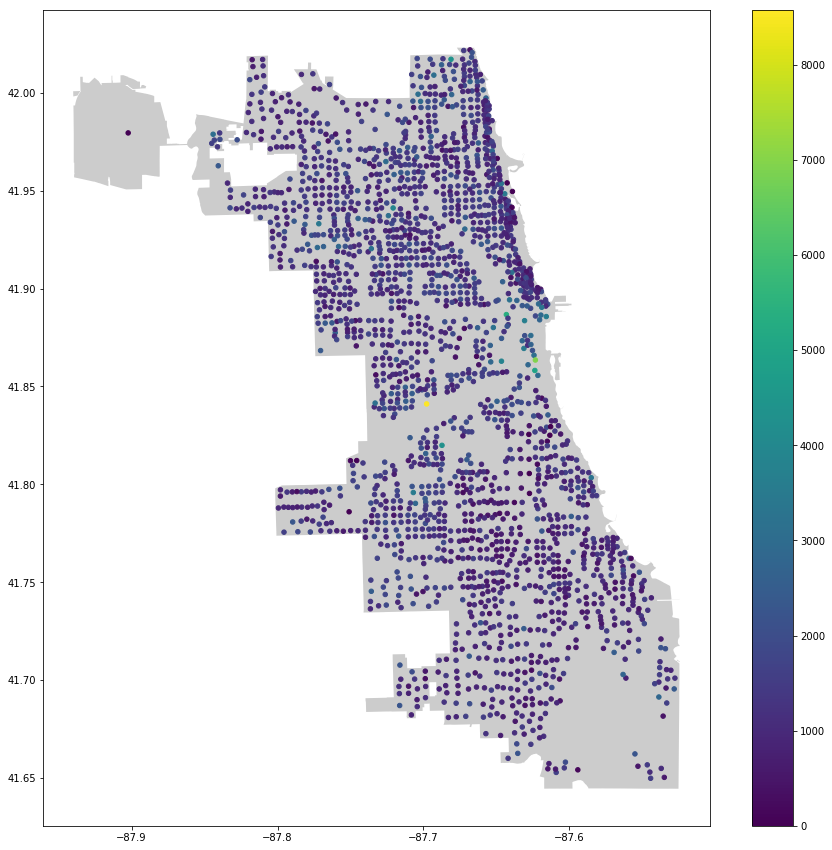

In [18]:
%matplotlib inline

# creating a geometry column for chicago only
geometry2 = [Point(xy) for xy in zip(chi['LONGITUDE'], chi['LATITUDE'])]

# Creating a Geographic data frame 
chi_gdf = gpd.GeoDataFrame(chi, crs=crs, geometry=geometry2)

street_map = gpd.read_file('geo_export_1fa84e9b-67d6-4d1c-ac81-4a73e71a6d8e.shp')
fig,ax     = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')

chi_gdf.plot(column = 'total_popu', ax = ax, markersize = 20, legend = True)




In [20]:
# overlay hospital points
geometry3 = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry3)

geo_df.head()

C:\Users\KMonzella\AppData\Local\Continuum\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,BLDGID,X,Y,BLDGNOTES,LABEL,FACILITY,CITY,ADDRESS,COMMONNAME,TYPE1,...,TRACT,AREA_NUMBE,COMMUNITY,ADDRESS_CHI,location,point,latitude,longitude,altitude,geometry
0,34142,1168427.011,1940926.452,NaN,Kindred- Lakeshore,Kindred Hospital - Chicago Lakeshore,Chicago,6130 N. Sheridan,Kindred Hospital - Chicago Lakeshore,HOSPITAL,...,30100,77,EDGEWATER,6130 N. Sheridan Chicago,"(Sheridan, 3940, North Sheridan Road, Wrigleyv...","(41.9538873, -87.654928, 0.0)",41.953887,-87.654928,0.0,POINT (-87.65493 41.95389)
1,262155,1171002.449,1916046.010,NaN,Children's,Children's Memorial Hospital,Chicago,225 East Chicago Avenue,Children's Memorial Hospital,HOSPITAL,...,71200,7,LINCOLN PARK,225 East Chicago Avenue Chicago,"(Ann & Robert H. Lurie Children's Hospital, 22...","(41.89624405, -87.62183140068906, 0.0)",41.896244,-87.621831,0.0,POINT (-87.62183 41.89624)
2,533051,1175254.006,1862670.662,NaN,St Bernard,St Bernard Hospital,Chicago,326 W. 64th Street,St. Bernard Hospital,HOSPITAL,...,680900,68,ENGLEWOOD,326 W. 64th Street Chicago,"(Saint Bernard Hospital, 326, West 64th Street...","(41.778591399999996, -87.6330563253586, 0.0)",41.778591,-87.633056,0.0,POINT (-87.63306 41.77859)
3,565454,1159091.550,1859131.693,NaN,Holy Cross,Holy Cross Hospital,Chicago,2701 W. 68th Street,Holy Cross Hospital,HOSPITAL,...,660900,66,CHICAGO LAWN,2701 W. 68th Street Chicago,"(Holy Cross Hospital, 2701, West 68th Street, ...","(41.7693648, -87.69221219763949, 0.0)",41.769365,-87.692212,0.0,POINT (-87.69221 41.76936)
4,220136,1169801.369,1920306.523,NaN,IL Masonic,Advocate Illinois Masonic Medical Center,Chicago,836 W. Wellington,Advocate Illinois Masonic Med Ctr,HOSPITAL,...,63000,6,LAKE VIEW,836 W. Wellington Chicago,"(Wellington, 941, West Wellington Avenue, Lake...","(41.9364321, -87.6532711, 0.0)",41.936432,-87.653271,0.0,POINT (-87.65327 41.93643)


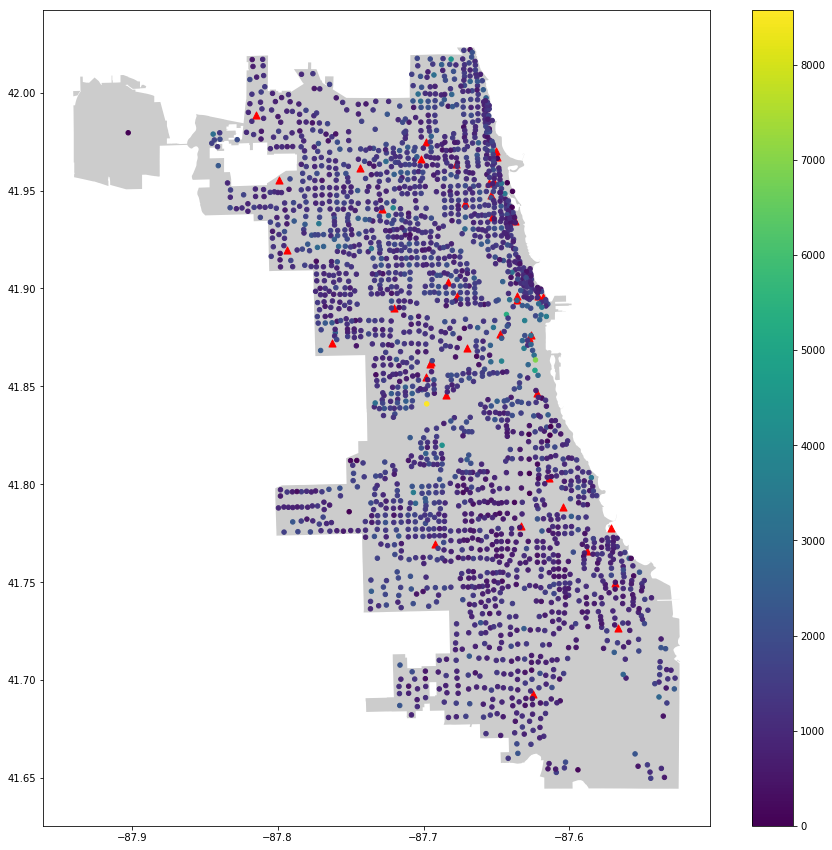

In [23]:
# plot together
fig,ax     = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df.plot(ax=ax, markersize=50, color = "red", marker = "^", label = "Existing hospital")
chi_gdf.plot(column = 'total_popu', ax = ax, markersize = 20, legend = True)


In [19]:



### scratch code
#poly = gpd.GeoDataFrame.from_file("geo_export_1fa84e9b-67d6-4d1c-ac81-4a73e71a6d8e.shp")
#poly.crs = 'epsg:4326'
#print(poly)

#identify those records from gdf that are intersecting with the region polygon
#this action will return a series with boolean values, if value is True it means the point 
#in that index location is within the polygon we are evaluating

#pip = points.st_within(poly)
#print(pip.head())

#creating a new gdf keep only the intersecting records
#chi = points.loc[pip].copy()
#chi
#pip

To dos:
    1. Make sure hospital locs in IL -- DONE
    2. Pull any additional census variables if group is interested. 
    3. Limit block groups to chicago boundaries - ask Sarah about the best way to do this -- DONE
    4. Upload files to group -- DONE
    5. Ask Sarah about how to map in Julia and calculate distance (euclidean distance) -- DONE